<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler

In [8]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [9]:
# Minmax Scaler
Scaler  = MinMaxScaler()

In [10]:
# Normalize the Data
x_train = Scaler.fit_transform(x_train)
x_test  = Scaler.fit_transform(x_test)

In [11]:
#getting shape of dataset to know number of features
x_train.shape
#404 observations, 13 features

(404, 13)

In [24]:
#intantiate an object model
nn = Sequential(name="FirstModel")
nn.add(Dense(13, input_shape=(13,), activation='sigmoid', name="Input_and_Layer_1"))
nn.add(Dense(13, activation='relu', name="Layer_2"))
nn.add(Dense(1, activation='sigmoid', name="Output"))
nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
nn.summary()

Model: "FirstModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_and_Layer_1 (Dense)    (None, 13)                182       
_________________________________________________________________
Layer_2 (Dense)              (None, 13)                182       
_________________________________________________________________
Output (Dense)               (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [25]:
nn_run = nn.fit(x_train,y_train, epochs=250, validation_split=.1, verbose=False)

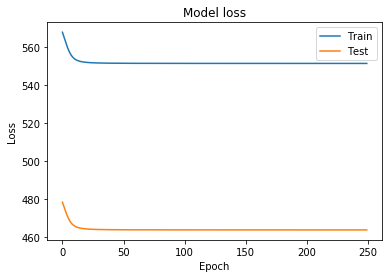

In [30]:
import matplotlib.pyplot as plt
plt.plot(nn_run.history['loss'])
plt.plot(nn_run.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [43]:
#scoring the test data
scores = nn.evaluate(x_test, y_test)

#NN MSE is 570.7035

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [48]:
#Going to do an XGBRegressor to compare with default paramaters
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

clf = XGBRegressor(eval_metric='rmse',objective='reg:squarederror')

clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

In [51]:
lin_mse = mean_squared_error(y_hat, y_test)
print("The Mean Square Error for XGBoost is: ", lin_mse)

The Mean Square Error for XGBoost is:  23.181757656109713


The MSE is signifigantly lower for linear regression out of the gate.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [88]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [89]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [90]:
np.unique(y_train, return_counts=True)
#there are 10 total classes in this dataset

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [91]:
num_classes = 10

In [92]:
#need to reshape the vectors into 1 dimensional arrays from 28x28 dimensional images
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Change dtypes to force floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# encode target to a categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [99]:
mnist_nn = Sequential(name="mnistmodel")

mnist_nn.add(Dense(98, input_shape=(784,), activation='relu', name="Input_and_layer1"))
mnist_nn.add(Dense(98, activation='relu', name="Layer2"))
mnist_nn.add(Dense(10, activation='softmax',name="Output"))

mnist_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mnist_nn.summary()

Model: "mnistmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_and_layer1 (Dense)     (None, 98)                76930     
_________________________________________________________________
Layer2 (Dense)               (None, 98)                9702      
_________________________________________________________________
Output (Dense)               (None, 10)                990       
Total params: 87,622
Trainable params: 87,622
Non-trainable params: 0
_________________________________________________________________


In [107]:
mnist_run = mnist_nn.fit(x_train, y_train, epochs=100, batch_size=500, validation_split=.1,  verbose=False)

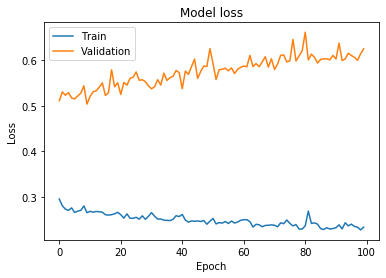

In [108]:
plt.plot(mnist_run.history['loss'])
plt.plot(mnist_run.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [109]:
scores = mnist_nn.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [118]:
print("Accuacy:",scores[1]*100)

Accuacy: 85.53000092506409


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.